# PREDICT WINE QUALITY

In [3]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline



from sklearn import preprocessing


In [4]:
#Loading dataset
wine = pd.read_csv('winequality-red.txt')
#Let's check how the data is distributed
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
#Target variable
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

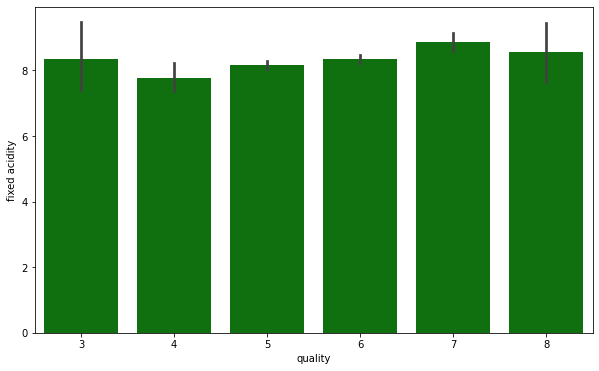

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine ,color= "green")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

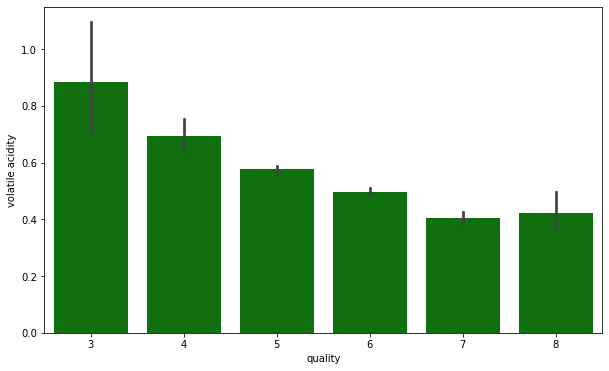

In [10]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine,color= "green")

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

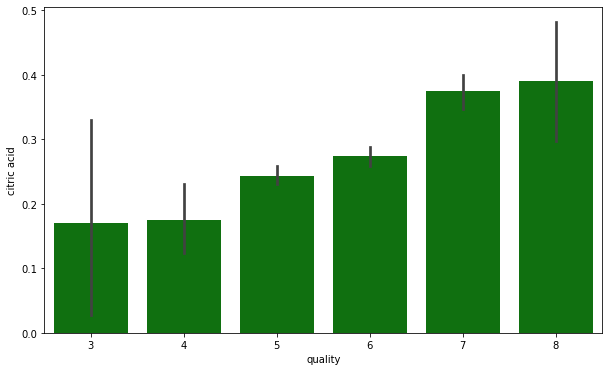

In [11]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine,color= "green")

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

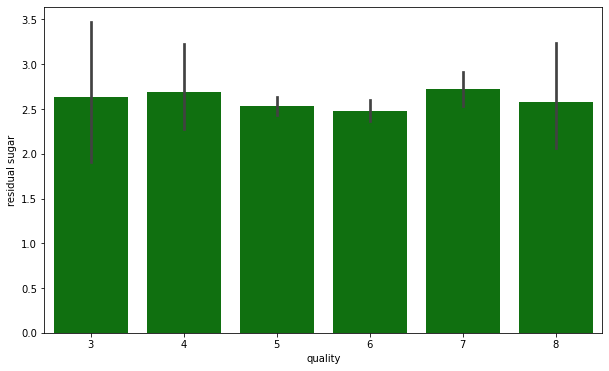

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine,color= "green")

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

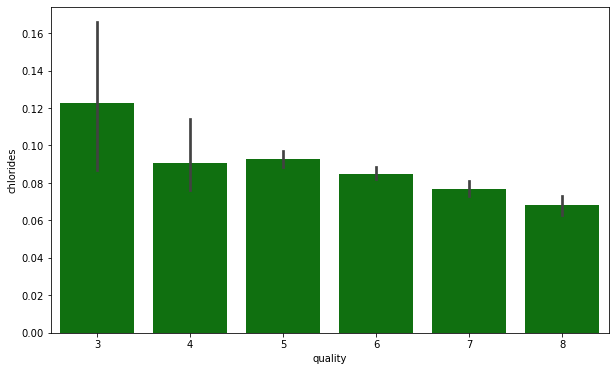

In [13]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine,color= "green")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

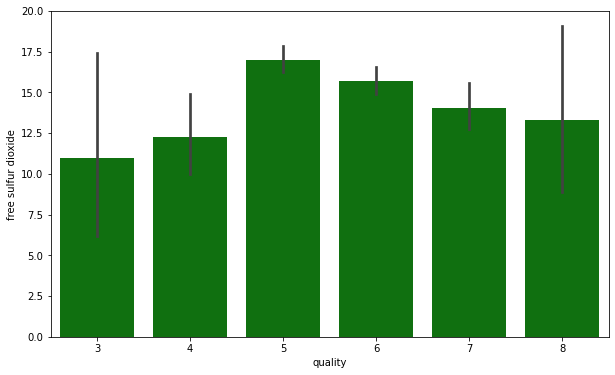

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine,color= "green")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

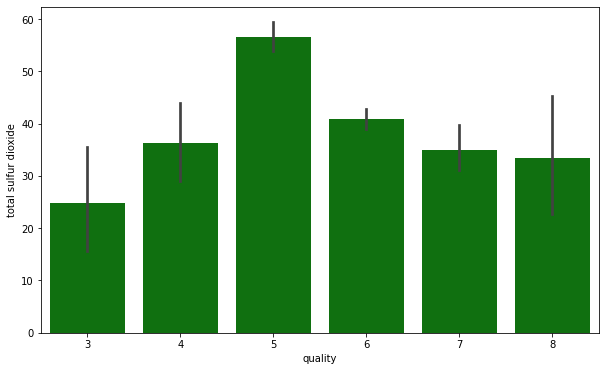

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine,color= "green")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

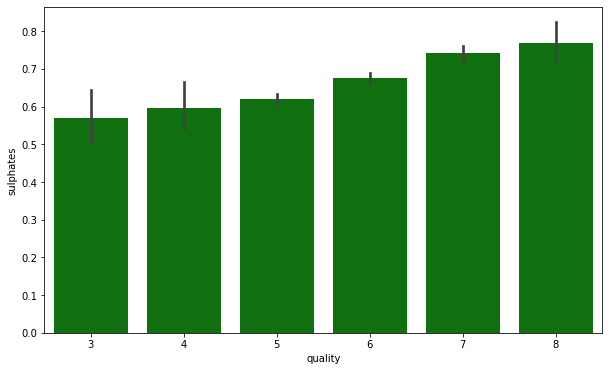

In [16]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine,color= "green")

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

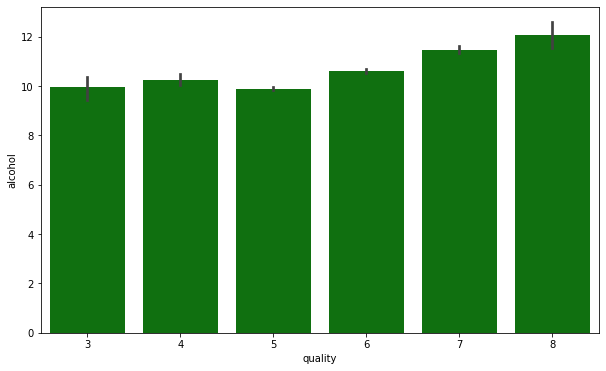

In [17]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine,color= "green")

In [18]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

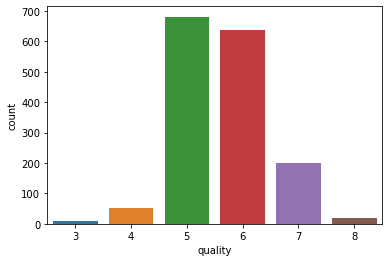

In [19]:
#count plot of quality variable:

sns.countplot(x='quality',data=wine)

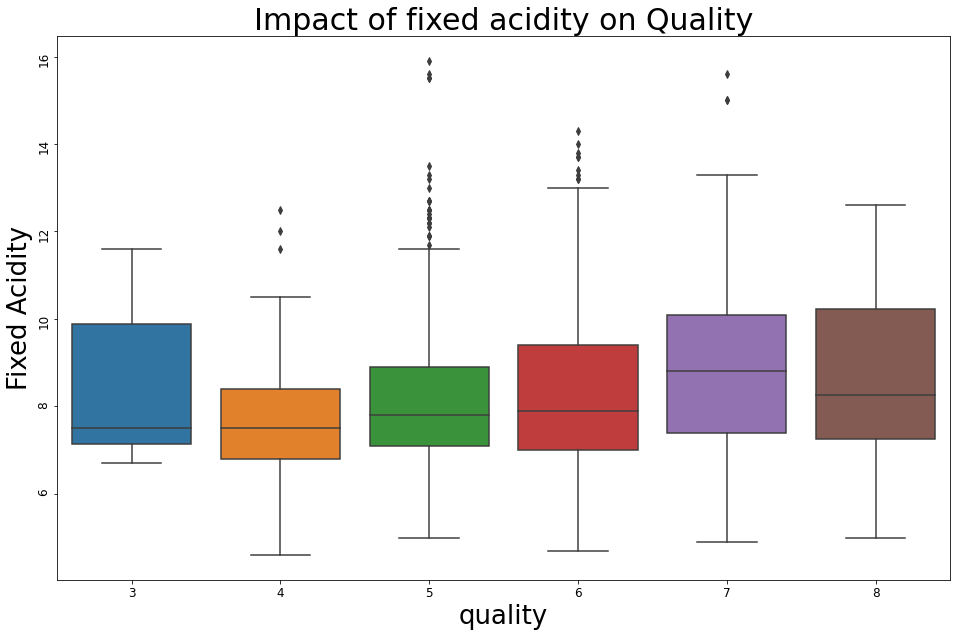

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='fixed acidity',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of fixed acidity on Quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('Fixed Acidity',fontsize=26)
plt.show()

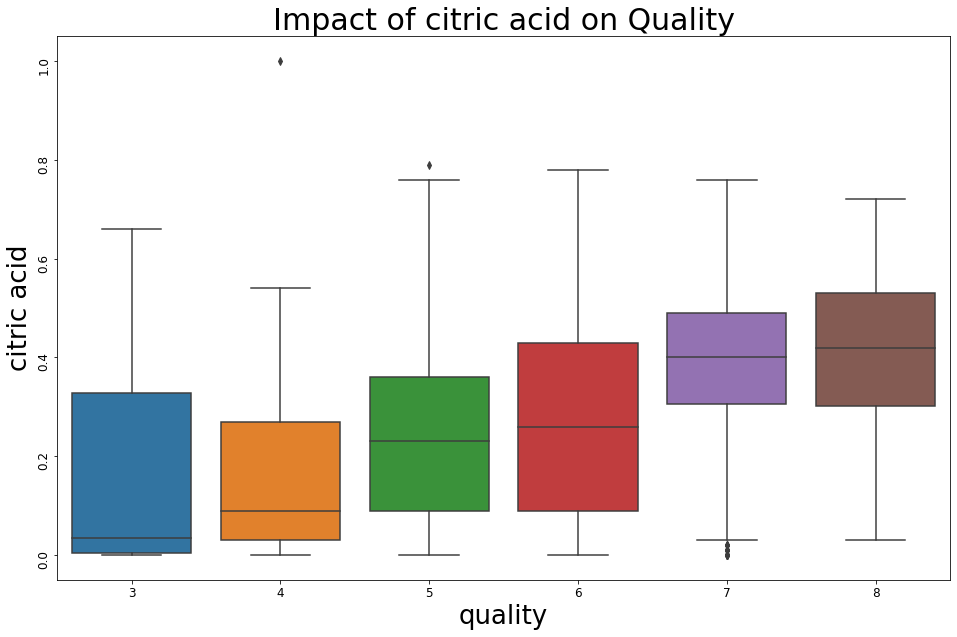

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='citric acid',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of citric acid on Quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('citric acid',fontsize=26)
plt.show()


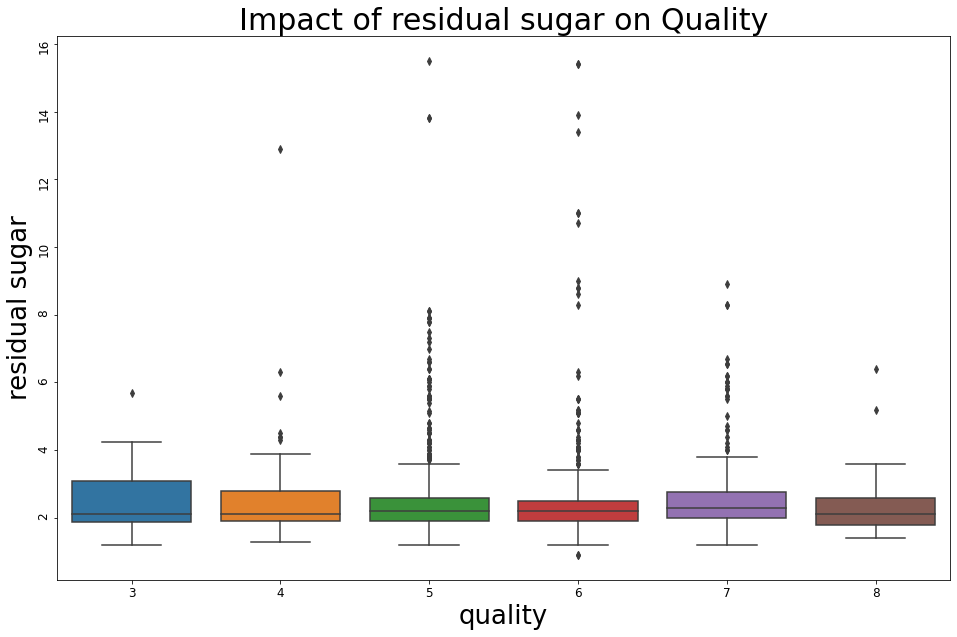

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='residual sugar',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of residual sugar on Quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('residual sugar',fontsize=26)
plt.show()

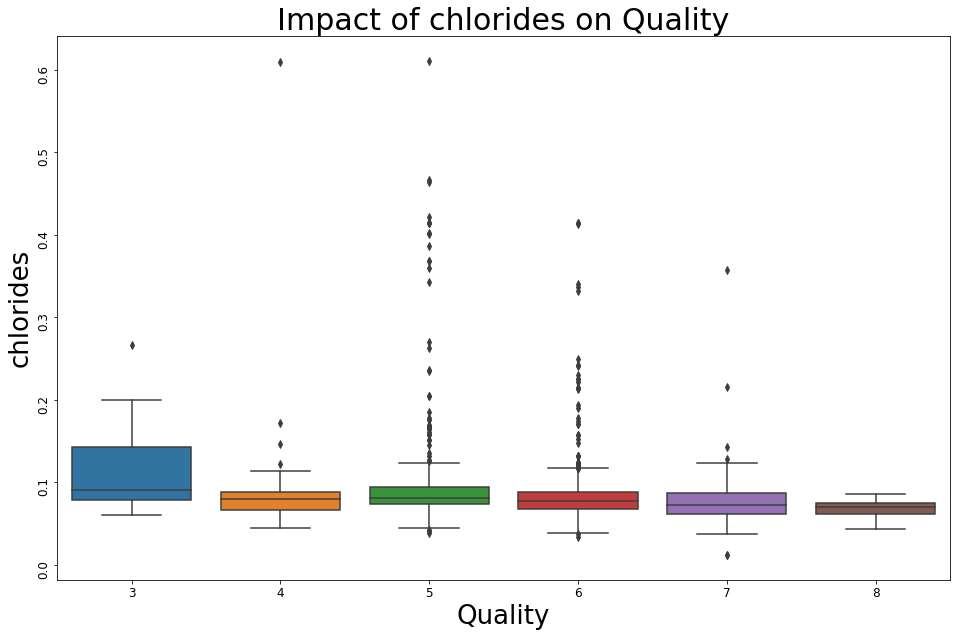

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='chlorides',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of chlorides on Quality",fontsize=30)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('chlorides',fontsize=26)
plt.show()

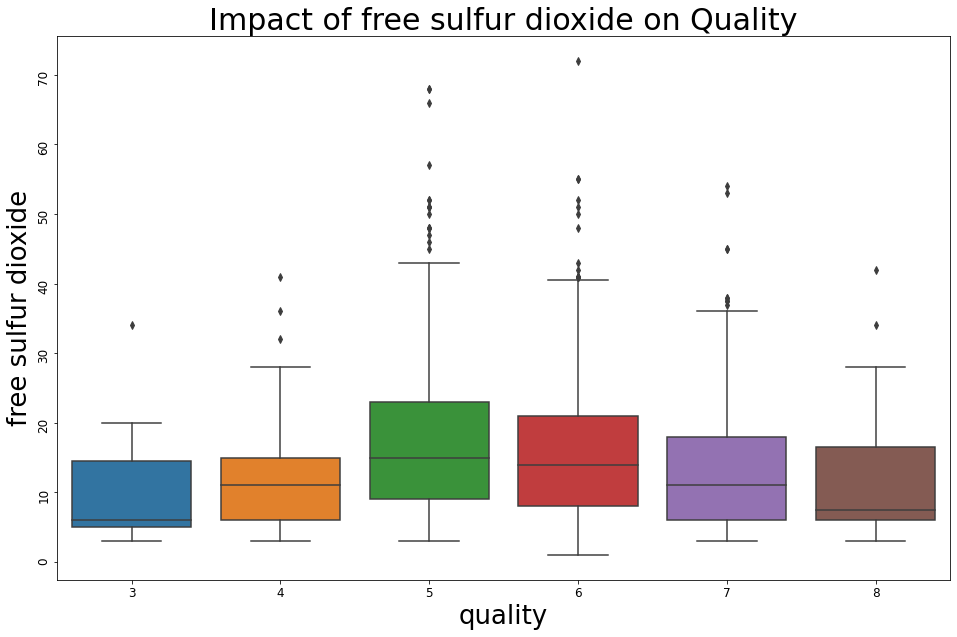

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='free sulfur dioxide',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of free sulfur dioxide on Quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('free sulfur dioxide',fontsize=26)
plt.show()

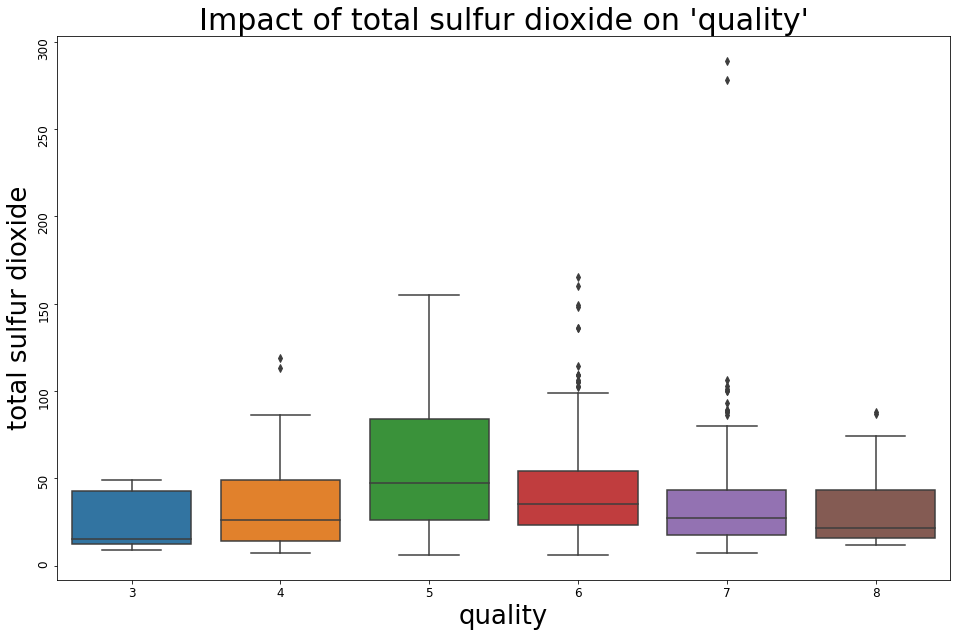

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='total sulfur dioxide',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of total sulfur dioxide on 'quality'",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('total sulfur dioxide',fontsize=26)
plt.show()

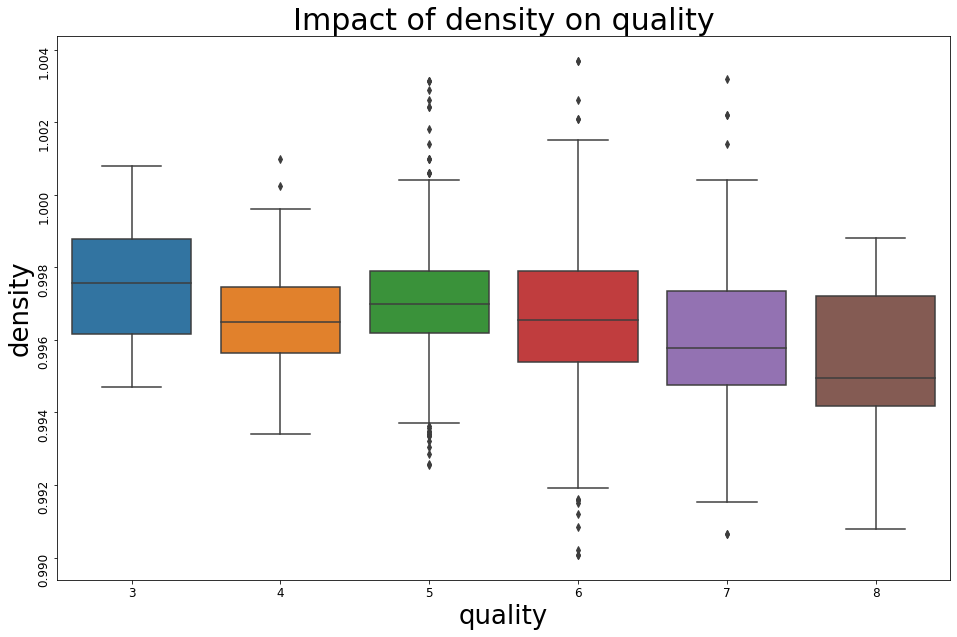

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='density',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of density on quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('density',fontsize=26)
plt.show()

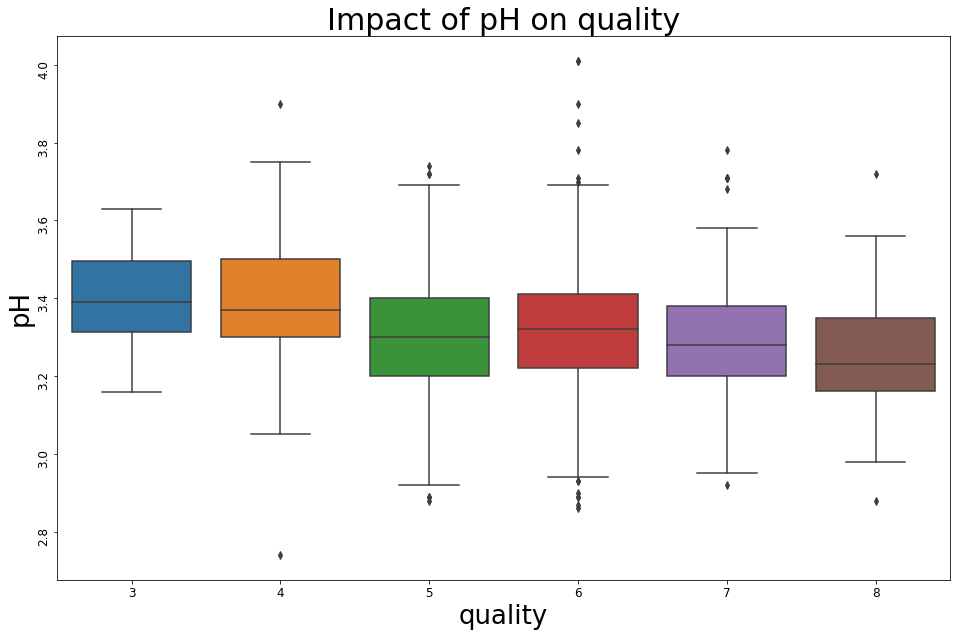

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='pH',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of pH on quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('pH',fontsize=26)
plt.show()

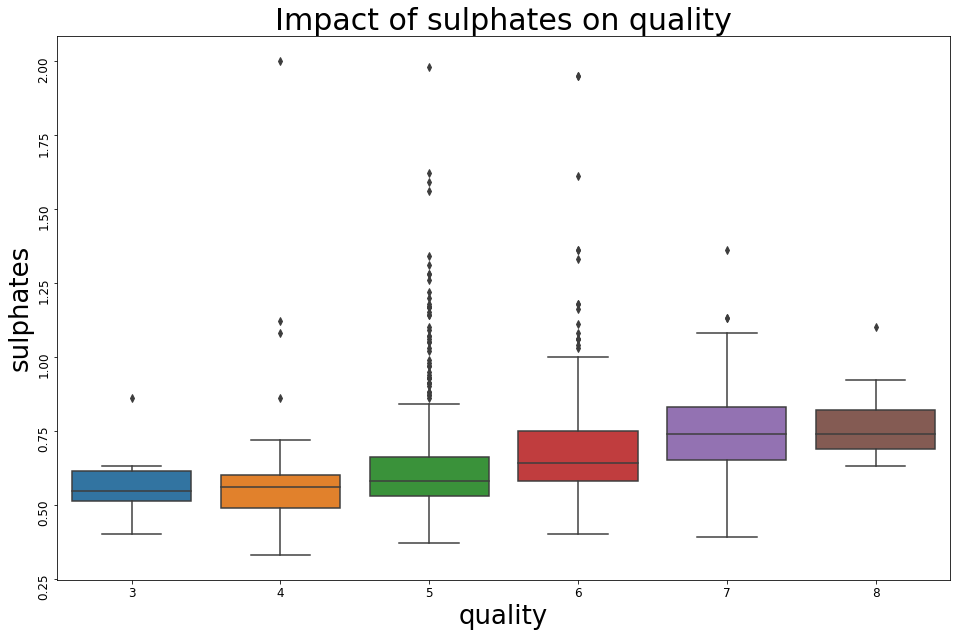

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='sulphates',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of sulphates on quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('sulphates',fontsize=26)
plt.show()

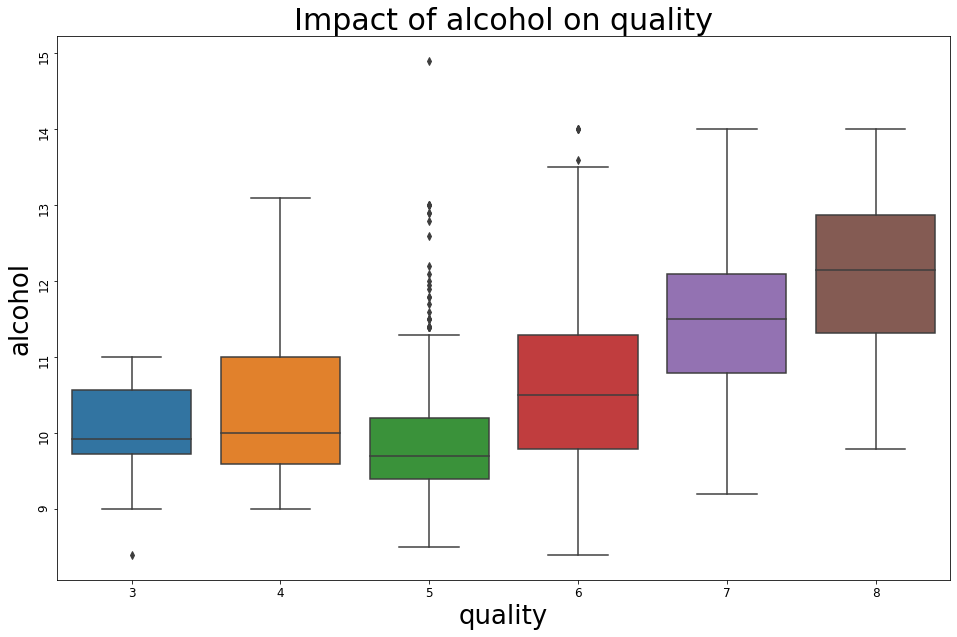

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='alcohol',x='quality',data=wine)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of alcohol on quality",fontsize=30)
plt.xlabel('quality',fontsize=26)
plt.ylabel('alcohol',fontsize=26)
plt.show()

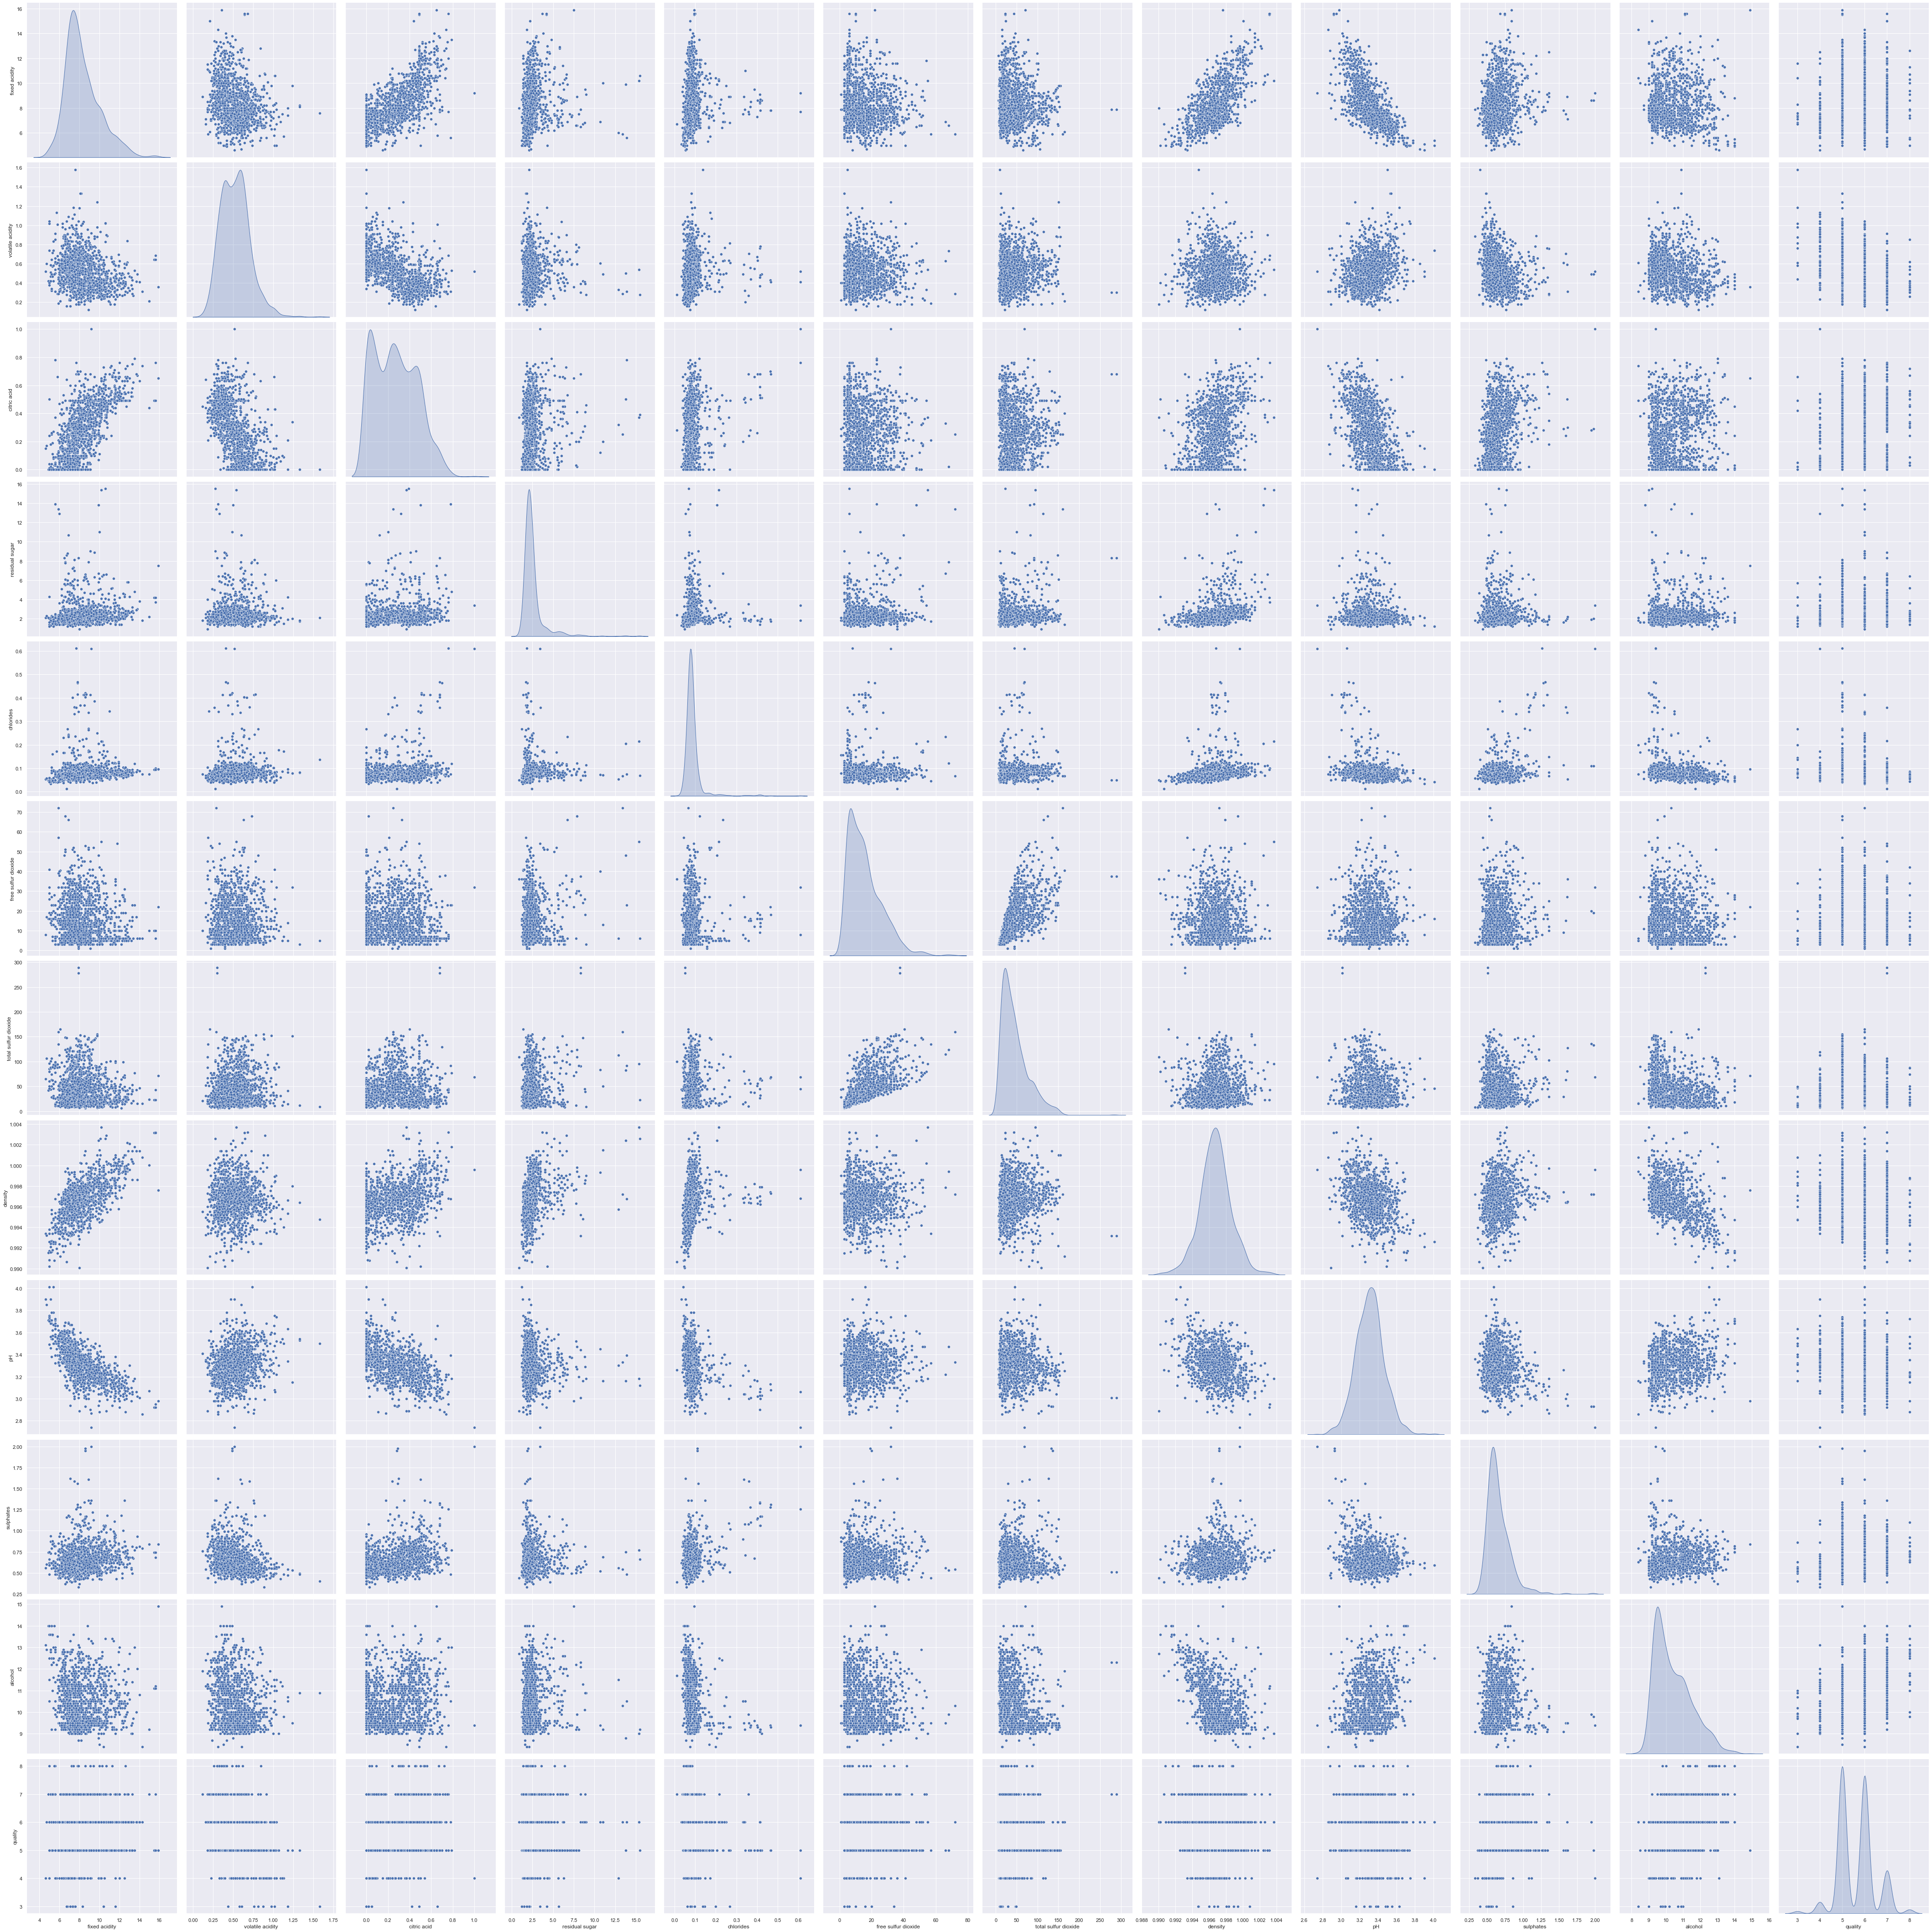

In [30]:
columns=wine.columns
sns.set()
sns.pairplot(wine[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

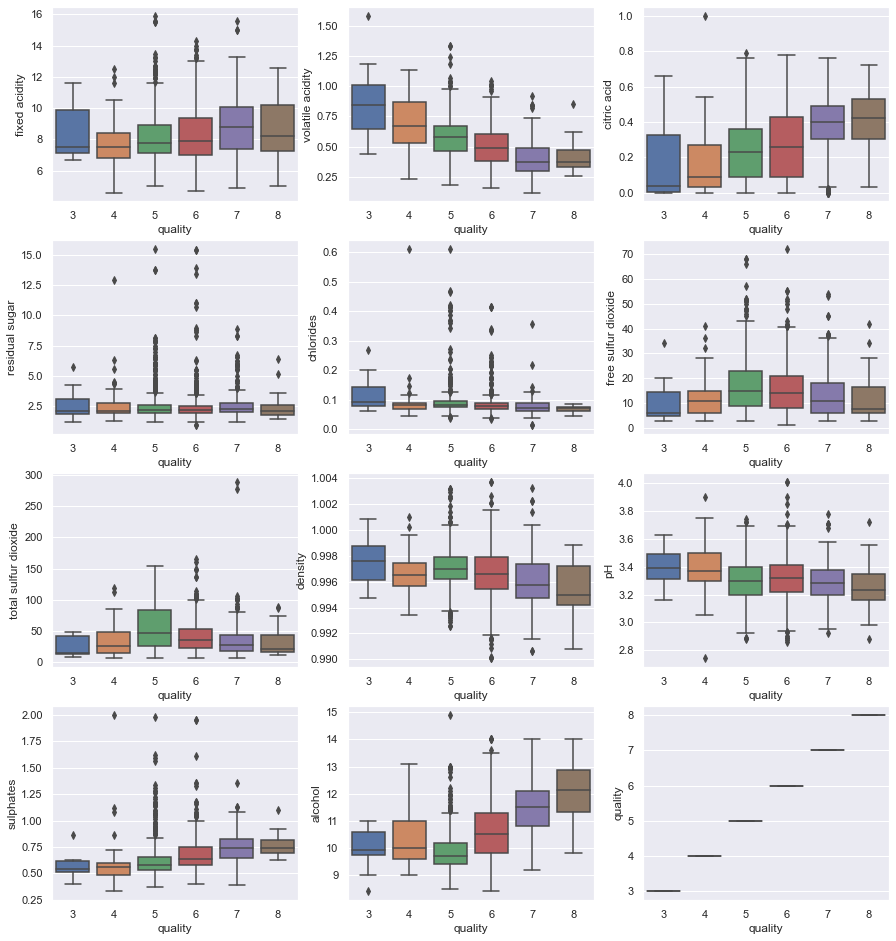

In [31]:
import warnings as wr
wr.filterwarnings('ignore')

i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=wine[feature], x = wine['quality'])
    i+=1

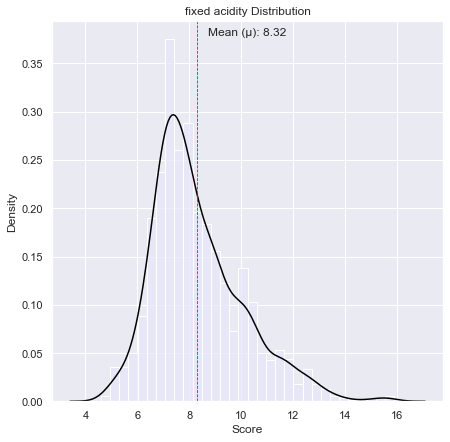

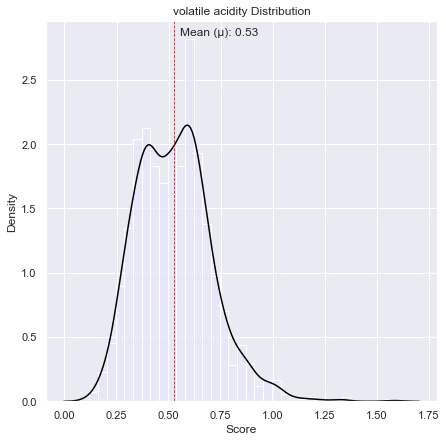

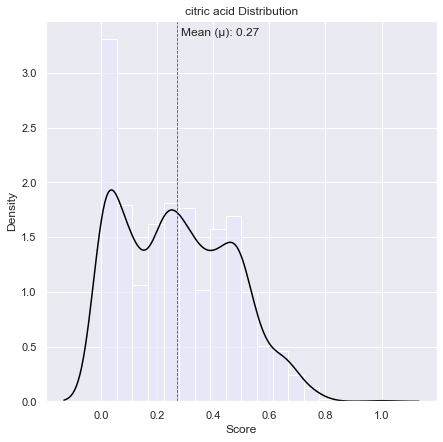

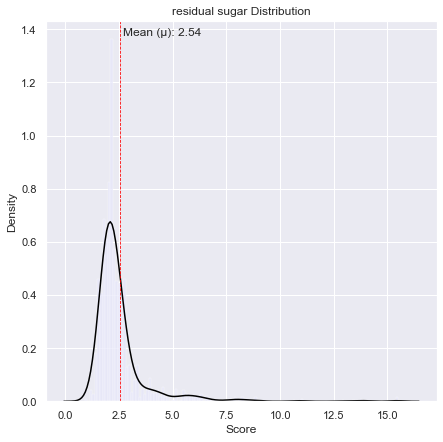

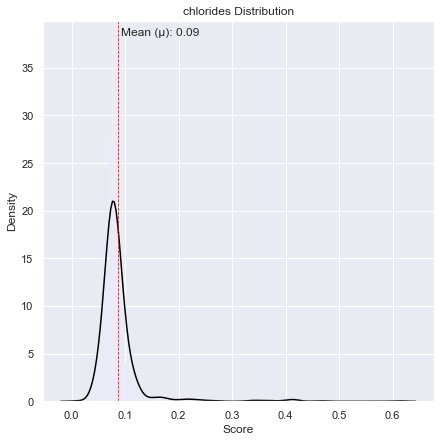

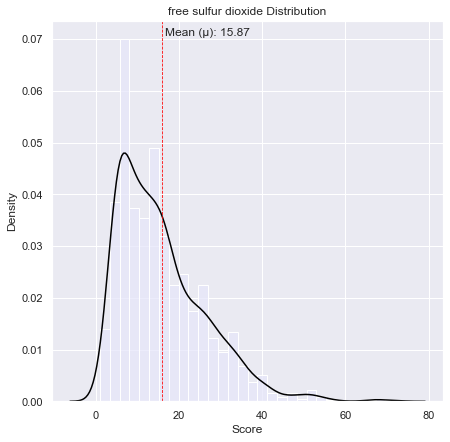

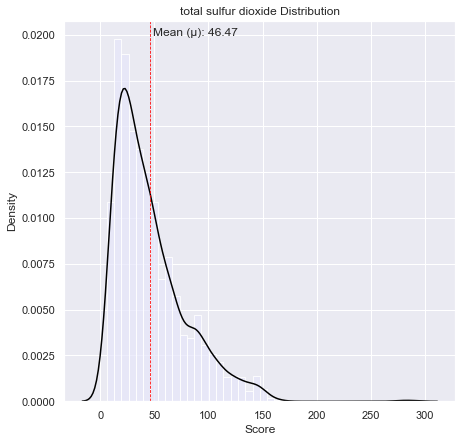

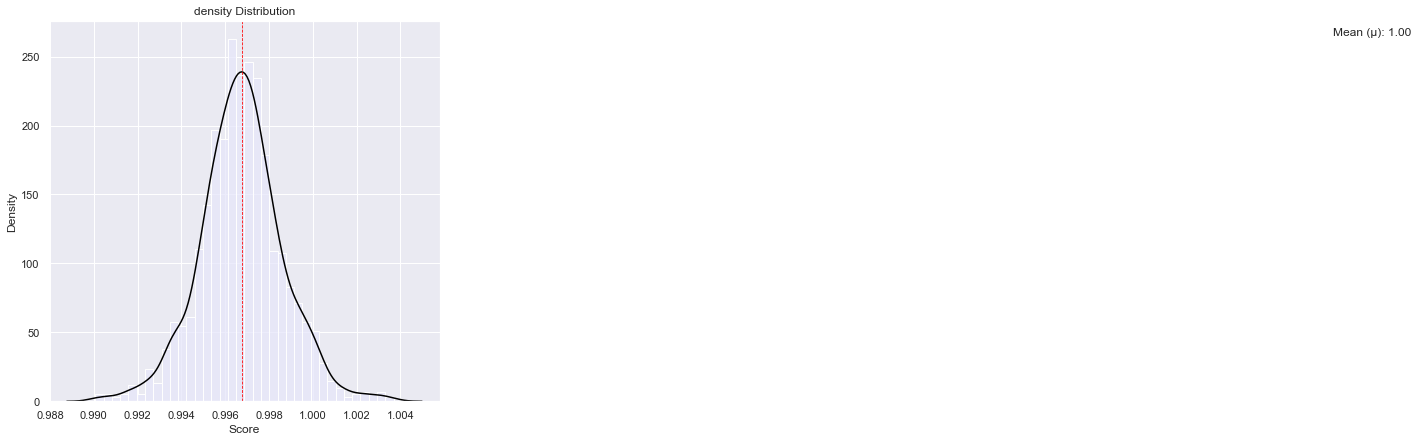

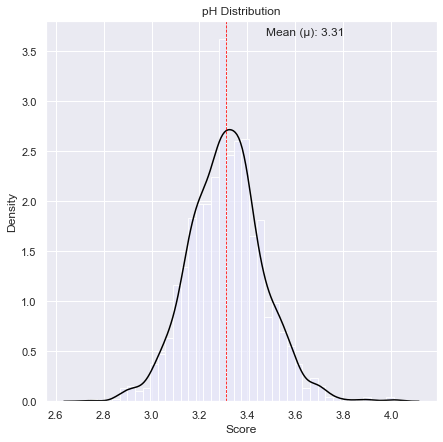

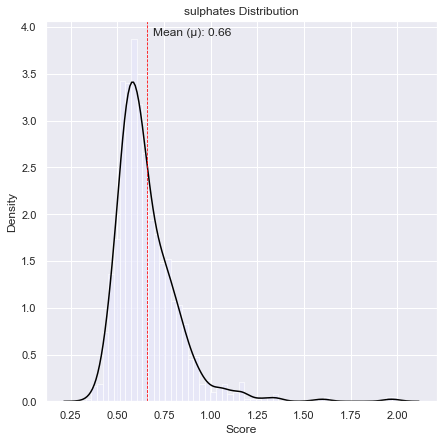

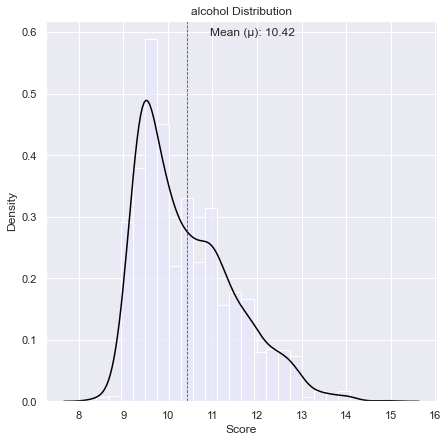

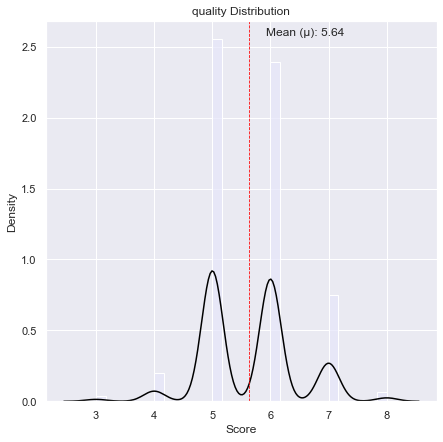

In [32]:
for column_name in wine.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(wine[column_name], stat='density',color='#E6E6FA')
  sns.kdeplot(wine[column_name], color='black')
  plt.axvline(wine[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(wine[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(wine[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

In [33]:
x = wine.drop('quality', axis=1)
y = wine['quality']


In [34]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [35]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

ERROR: Could not find a version that satisfies the requirement scikit-learn==0.22.1 (from versions: none)
ERROR: No matching distribution found for scikit-learn==0.22.1


In [36]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
x, y = oversample.fit_resample(x, y)

In [37]:

# classify function

from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [40]:
import numpy as np
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy: 78.9628180039139
CV Score: 74.08232157125629


In [41]:
model = RandomForestClassifier()
classify(model, x, y)


Accuracy: 84.24657534246576
CV Score: 80.91009208356651


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy: 86.0078277886497
CV Score: 82.35422097063321
